# Analysis notebook for mapping evaluation

Assumes results generated - see Makefile for details

In [1]:
task = "fbbt-zfa"
#task = "fbbt-wbbt"
#task = "hsapdv-mmusdv"

In [2]:
# Parameters
task = "hsapdv-mmusdv"


In [3]:
import pandas as pd

In [4]:
%run md_utils.py

## Utility SSSOM loading methods

In [5]:
def task_method_sssom_path(method: str):
    if method == "curated":
        dir = "data"
    else:
        dir = "results"
    return f"../{dir}/{method}-{task}.sssom.tsv"

In [6]:
def load_sssom(method):
    path = task_method_sssom_path(method)
    df = pd.read_csv(path, sep="\t", comment="#")
    df["mapping_source"]  = method
    if method == "lexmatch":
        df[["predicate_id"]] = "skos:exactMatch"
    return df.drop_duplicates()

lexmatch = load_sssom("lexmatch")
lexmatch

,subject_id,subject_label,predicate_id,object_id,object_label,mapping_justification,mapping_tool,confidence,subject_match_field,object_match_field,match_string,mapping_source
0,HsapDv:0000000,life cycle stage,skos:exactMatch,MmusDv:0000000,life cycle stage,semapv:LexicalMatching,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,uberon:0000105,lexmatch
1,HsapDv:0000000,life cycle stage,skos:exactMatch,MmusDv:0000000,life cycle stage,semapv:LexicalMatching,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,developmental stage,lexmatch
2,HsapDv:0000000,life cycle stage,skos:exactMatch,MmusDv:0000000,life cycle stage,semapv:LexicalMatching,oaklib,0.5,oio:hasNarrowSynonym,oio:hasNarrowSynonym,stage,lexmatch
3,HsapDv:0000000,life cycle stage,skos:exactMatch,MmusDv:0000000,life cycle stage,semapv:LexicalMatching,oaklib,0.5,rdfs:label,rdfs:label,life cycle stage,lexmatch
4,HsapDv:0000001,life cycle,skos:exactMatch,MmusDv:0000001,life cycle,semapv:LexicalMatching,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,uberon:0000104,lexmatch
...,...,...,...,...,...,...,...,...,...,...,...,...
56,HsapDv:0000266,young adult stage,skos:exactMatch,MmusDv:0000153,young adult stage,semapv:LexicalMatching,oaklib,0.5,rdfs:label,rdfs:label,young adult stage,lexmatch
57,HsapDv:0000267,middle aged stage,skos:exactMatch,MmusDv:0000135,middle aged stage,semapv:LexicalMatching,oaklib,0.5,rdfs:label,rdfs:label,middle aged stage,lexmatch
58,HsapDv:0000271,juvenile stage (5-14 yo),skos:exactMatch,MmusDv:0000178,juvenile stage,semapv:LexicalMatching,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,uberon:0034919,lexmatch
59,HsapDv:0010000,postnatal stage,skos:exactMatch,MmusDv:0000092,postnatal stage,semapv:LexicalMatching,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,uberon:0000066,lexmatch


In [7]:
lexmatch.groupby(["subject_match_field", "object_match_field"]).count()

subject_id  subject_label  \
subject_match_field  object_match_field                                 
oio:hasBroadSynonym  rdfs:label                      1              1   
oio:hasDbXref        oio:hasDbXref                  19             19   
oio:hasExactSynonym  oio:hasExactSynonym             1              1   
                     rdfs:label                      2              2   
oio:hasNarrowSynonym oio:hasNarrowSynonym            1              1   
rdfs:label           oio:hasRelatedSynonym           1              1   
                     rdfs:label                     36             36   

                                            predicate_id  object_id  \
subject_match_field  object_match_field                               
oio:hasBroadSynonym  rdfs:label                        1          1   
oio:hasDbXref        oio:hasDbXref                    19         19   
oio:hasExactSynonym  oio:hasExactSynonym               1          1   
                     rdfs:label                        2          2   
oio:hasNarrowSynonym oio:hasNarrowSynonym              1          1   
rdfs:label           oio:hasRelatedSynonym             1          1   
                     rdfs:label                       36         36   

                                            object_label  \
subject_match_field  object_match_field                    
oio:hasBroadSynonym  rdfs:label                        1   
oio:hasDbXref        oio:hasDbXref                    19   
oio:hasExactSynonym  oio:hasExactSynonym               1   
                     rdfs:label                        2   
oio:hasNarrowSynonym oio:hasNarrowSynonym              1   
rdfs:label           oio:hasRelatedSynonym             1   
                     rdfs:label                       36   

                                            mapping_justification  \
subject_match_field  object_match_field                             
oio:hasBroadSynonym  rdfs:label                                 1   
oio:hasDbXref        oio:hasDbXref                             19   
oio:hasExactSynonym  oio:hasExactSynonym                        1   
                     rdfs:label                                 2   
oio:hasNarrowSynonym oio:hasNarrowSynonym                       1   
rdfs:label           oio:hasRelatedSynonym                      1   
                     rdfs:label                                36   

                                            mapping_tool  confidence  \
subject_match_field  object_match_field                                
oio:hasBroadSynonym  rdfs:label                        1           1   
oio:hasDbXref        oio:hasDbXref                    19          19   
oio:hasExactSynonym  oio:hasExactSynonym               1           1   
                     rdfs:label                        2           2   
oio:hasNarrowSynonym oio:hasNarrowSynonym              1           1   
rdfs:label           oio:hasRelatedSynonym             1           1   
                     rdfs:label                       36          36   

                                            match_string  mapping_source  
subject_match_field  object_match_field                                   
oio:hasBroadSynonym  rdfs:label                        1               1  
oio:hasDbXref        oio:hasDbXref                    19              19  
oio:hasExactSynonym  oio:hasExactSynonym               1               1  
                     rdfs:label                        2               2  
oio:hasNarrowSynonym oio:hasNarrowSynonym              1               1  
rdfs:label           oio:hasRelatedSynonym             1               1  
                     rdfs:label                       36              36

In [8]:
curated = load_sssom("curated")
curated

,subject_id,subject_label,predicate_id,object_id,object_label,mapping_justification,mapping_tool,confidence,subject_match_field,object_match_field,match_string,mapping_source
0,HsapDv:0000000,life cycle stage,skos:exactMatch,MmusDv:0000000,life cycle stage,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref,oio:hasDbXref,uberon:0000105,curated
1,HsapDv:0000000,life cycle stage,skos:exactMatch,MmusDv:0000000,life cycle stage,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref,oio:hasDbXref-INVERSE,uberon:0000105,curated
5,HsapDv:0000000,life cycle stage,skos:exactMatch,MmusDv:0000000,life cycle stage,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref-INVERSE,oio:hasDbXref,uberon:0000105,curated
9,HsapDv:0000000,life cycle stage,skos:exactMatch,MmusDv:0000000,life cycle stage,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref-INVERSE,oio:hasDbXref-INVERSE,uberon:0000105,curated
25,HsapDv:0000001,life cycle,skos:exactMatch,MmusDv:0000001,life cycle,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref,oio:hasDbXref,uberon:0000104,curated
26,HsapDv:0000001,life cycle,skos:exactMatch,MmusDv:0000001,life cycle,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref,oio:hasDbXref-INVERSE,uberon:0000104,curated
30,HsapDv:0000001,life cycle,skos:exactMatch,MmusDv:0000001,life cycle,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref-INVERSE,oio:hasDbXref,uberon:0000104,curated
34,HsapDv:0000001,life cycle,skos:exactMatch,MmusDv:0000001,life cycle,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref-INVERSE,oio:hasDbXref-INVERSE,uberon:0000104,curated
50,HsapDv:0000002,embryonic stage,skos:exactMatch,MmusDv:0000002,embryonic stage,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref-INVERSE,oio:hasDbXref-INVERSE,uberon:0000068,curated
66,HsapDv:0000002,embryonic stage,skos:exactMatch,MmusDv:0000042,prenatal stage,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref-INVERSE,oio:hasDbXref,uberon:0000068,curated


In [9]:
gpt3 = load_sssom("gpt3")
gpt3

,subject_id,subject_label,predicate_id,object_id,object_label,mapping_justification,subject_source,object_source,mapping_tool,confidence,subject_match_field,object_match_field,match_string,mapping_source
0,HsapDv:0000000,life cycle stage,skos:exactMatch,MmusDv:0000000,life cycle stage,semapv:LexicalMatching,HsapDv,MmusDv,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,uberon:0000105,gpt3
1,HsapDv:0000001,life cycle,skos:exactMatch,MmusDv:0000001,life cycle,semapv:LexicalMatching,HsapDv,MmusDv,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,uberon:0000104,gpt3
2,HsapDv:0000002,embryonic stage,skos:exactMatch,MmusDv:0000002,embryonic stage,semapv:LexicalMatching,HsapDv,MmusDv,oaklib,0.5,rdfs:label,rdfs:label,embryonic stage,gpt3
3,HsapDv:0000003,Carnegie stage 01,skos:relatedMatch,MmusDv:0000003,Theiler stage 01,semapv:LexicalMatching,HsapDv,MmusDv,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,uberon:0000106,gpt3
4,HsapDv:0000005,Carnegie stage 02,owl:differentFrom,MmusDv:0000004,cleavage stage,semapv:LexicalMatching,HsapDv,MmusDv,oaklib,0.5,oio:hasBroadSynonym,rdfs:label,cleavage stage,gpt3
5,HsapDv:0000006,blastula stage,skos:relatedMatch,MmusDv:0000007,blastula stage,semapv:LexicalMatching,HsapDv,MmusDv,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,uberon:0000108,gpt3
6,HsapDv:0000010,gastrula stage,skos:exactMatch,MmusDv:0000013,gastrula stage,semapv:LexicalMatching,HsapDv,MmusDv,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,uberon:0000109,gpt3
7,HsapDv:0000012,neurula stage,skos:narrowMatch,MmusDv:0000017,Theiler stage 11,semapv:LexicalMatching,HsapDv,MmusDv,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,uberon:0000110,gpt3
8,HsapDv:0000015,organogenesis stage,skos:exactMatch,MmusDv:0000018,organogenesis stage,semapv:LexicalMatching,HsapDv,MmusDv,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,uberon:0000111,gpt3
9,HsapDv:0000037,fetal stage,skos:exactMatch,MmusDv:0000031,fetal stage,semapv:LexicalMatching,HsapDv,MmusDv,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,uberon:0007220,gpt3


In [10]:
gpt4 = load_sssom("gpt4")
gpt4

,subject_id,subject_label,predicate_id,object_id,object_label,mapping_justification,subject_source,object_source,mapping_tool,confidence,subject_match_field,object_match_field,match_string,mapping_source
0,HsapDv:0000000,life cycle stage,skos:exactMatch,MmusDv:0000000,life cycle stage,semapv:LexicalMatching,HsapDv,MmusDv,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,uberon:0000105,gpt4
1,HsapDv:0000001,life cycle,skos:relatedMatch,MmusDv:0000001,life cycle,semapv:LexicalMatching,HsapDv,MmusDv,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,uberon:0000104,gpt4
2,HsapDv:0000002,embryonic stage,skos:exactMatch,MmusDv:0000002,embryonic stage,semapv:LexicalMatching,HsapDv,MmusDv,oaklib,0.5,rdfs:label,rdfs:label,embryonic stage,gpt4
3,HsapDv:0000003,Carnegie stage 01,skos:exactMatch,MmusDv:0000003,Theiler stage 01,semapv:LexicalMatching,HsapDv,MmusDv,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,uberon:0000106,gpt4
4,HsapDv:0000005,Carnegie stage 02,skos:exactMatch,MmusDv:0000004,cleavage stage,semapv:LexicalMatching,HsapDv,MmusDv,oaklib,0.5,oio:hasBroadSynonym,rdfs:label,cleavage stage,gpt4
5,HsapDv:0000006,blastula stage,skos:exactMatch,MmusDv:0000007,blastula stage,semapv:LexicalMatching,HsapDv,MmusDv,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,uberon:0000108,gpt4
6,HsapDv:0000010,gastrula stage,skos:exactMatch,MmusDv:0000013,gastrula stage,semapv:LexicalMatching,HsapDv,MmusDv,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,uberon:0000109,gpt4
7,HsapDv:0000012,neurula stage,skos:exactMatch,MmusDv:0000017,Theiler stage 11,semapv:LexicalMatching,HsapDv,MmusDv,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,uberon:0000110,gpt4
8,HsapDv:0000015,organogenesis stage,skos:exactMatch,MmusDv:0000018,organogenesis stage,semapv:LexicalMatching,HsapDv,MmusDv,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,uberon:0000111,gpt4
9,HsapDv:0000037,fetal stage,skos:exactMatch,MmusDv:0000031,fetal stage,semapv:LexicalMatching,HsapDv,MmusDv,oaklib,0.5,oio:hasDbXref,oio:hasDbXref,uberon:0007220,gpt4


In [11]:
pd.concat([gpt3, gpt4]).groupby(["mapping_source", "predicate_id"]).count()

subject_id  subject_label  object_id  \
mapping_source predicate_id                                              
gpt3           owl:differentFrom           8              8          8   
               skos:broadMatch             1              1          1   
               skos:exactMatch            14             14         14   
               skos:narrowMatch            2              2          2   
               skos:relatedMatch          19             19         19   
gpt4           skos:exactMatch            12             12         12   
               skos:relatedMatch          32             32         32   

                                  object_label  mapping_justification  \
mapping_source predicate_id                                             
gpt3           owl:differentFrom             8                      8   
               skos:broadMatch               1                      1   
               skos:exactMatch              14                     14   
               skos:narrowMatch              2                      2   
               skos:relatedMatch            19                     19   
gpt4           skos:exactMatch              12                     12   
               skos:relatedMatch            32                     32   

                                  subject_source  object_source  mapping_tool  \
mapping_source predicate_id                                                     
gpt3           owl:differentFrom               8              8             8   
               skos:broadMatch                 1              1             1   
               skos:exactMatch                14             14            14   
               skos:narrowMatch                2              2             2   
               skos:relatedMatch              19             19            19   
gpt4           skos:exactMatch                12             12            12   
               skos:relatedMatch              32             32            32   

                                  confidence  subject_match_field  \
mapping_source predicate_id                                         
gpt3           owl:differentFrom           8                    8   
               skos:broadMatch             1                    1   
               skos:exactMatch            14                   14   
               skos:narrowMatch            2                    2   
               skos:relatedMatch          19                   19   
gpt4           skos:exactMatch            12                   12   
               skos:relatedMatch          32                   32   

                                  object_match_field  match_string  
mapping_source predicate_id                                         
gpt3           owl:differentFrom                   8             8  
               skos:broadMatch                     1             1  
               skos:exactMatch                    14            14  
               skos:narrowMatch                    2             2  
               skos:relatedMatch                  19            19  
gpt4           skos:exactMatch                    12            12  
               skos:relatedMatch                  32            32

In [12]:
logmap = load_sssom("logmap")
logmap

,subject_id,object_id,confidence,predicate_id,subject_label,object_label,mapping_source
0,HsapDv:0000194,MmusDv:0000125,1.00,skos:exactMatch,21-month-old stage,21-month-old stage,logmap
1,HsapDv:0000006,MmusDv:0000007,1.00,skos:exactMatch,blastula stage,blastula stage,logmap
2,HsapDv:0000002,MmusDv:0000002,1.00,skos:exactMatch,embryonic stage,embryonic stage,logmap
3,HsapDv:0000001,MmusDv:0000001,1.00,skos:exactMatch,life cycle,life cycle,logmap
4,HsapDv:0000000,MmusDv:0000000,0.95,skos:exactMatch,life cycle stage,life cycle stage,logmap
5,HsapDv:0000271,MmusDv:0000178,1.03,skos:exactMatch,juvenile stage (5-14 yo),juvenile stage,logmap
6,HsapDv:0000189,MmusDv:0000087,1.00,skos:exactMatch,16-month-old stage,16-month-old stage,logmap
7,HsapDv:0000188,MmusDv:0000086,1.00,skos:exactMatch,15-month-old stage,15-month-old stage,logmap
8,HsapDv:0000187,MmusDv:0000085,1.00,skos:exactMatch,14-month-old stage,14-month-old stage,logmap
9,HsapDv:0000186,MmusDv:0000084,1.00,skos:exactMatch,13-month-old stage,13-month-old stage,logmap


In [13]:
def filter_logmap(df, thresh: float):
    return df.query(f"confidence > {thresh}")
filter_logmap(logmap, 0.8)

,subject_id,object_id,confidence,predicate_id,subject_label,object_label,mapping_source
0,HsapDv:0000194,MmusDv:0000125,1.00,skos:exactMatch,21-month-old stage,21-month-old stage,logmap
1,HsapDv:0000006,MmusDv:0000007,1.00,skos:exactMatch,blastula stage,blastula stage,logmap
2,HsapDv:0000002,MmusDv:0000002,1.00,skos:exactMatch,embryonic stage,embryonic stage,logmap
3,HsapDv:0000001,MmusDv:0000001,1.00,skos:exactMatch,life cycle,life cycle,logmap
4,HsapDv:0000000,MmusDv:0000000,0.95,skos:exactMatch,life cycle stage,life cycle stage,logmap
5,HsapDv:0000271,MmusDv:0000178,1.03,skos:exactMatch,juvenile stage (5-14 yo),juvenile stage,logmap
6,HsapDv:0000189,MmusDv:0000087,1.00,skos:exactMatch,16-month-old stage,16-month-old stage,logmap
7,HsapDv:0000188,MmusDv:0000086,1.00,skos:exactMatch,15-month-old stage,15-month-old stage,logmap
8,HsapDv:0000187,MmusDv:0000085,1.00,skos:exactMatch,14-month-old stage,14-month-old stage,logmap
9,HsapDv:0000186,MmusDv:0000084,1.00,skos:exactMatch,13-month-old stage,13-month-old stage,logmap


In [14]:
def evaluate(results, gold):
    # filtered = results.query("predicate_id != 'owl:differentFrom'")
    filtered = results.query("predicate_id == 'skos:exactMatch'")
    cols = ["subject_id", "object_id"]
    results_set = set([tuple(x) for x in filtered[cols].values])
    gold_set = set([tuple(x) for x in gold[cols].values])

    # Calculate TP, FP, FN
    TP = len(results_set.intersection(gold_set))
    FP = len(results_set.difference(gold_set))
    FN = len(gold_set.difference(results_set))

    # Calculate precision and recall
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0

    # Calculate F1 score
    F1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    return F1, precision, recall

evaluate(gpt3, curated)

(0.5555555555555556, 0.7142857142857143, 0.45454545454545453)

In [15]:
pairs = [(conf, evaluate(filter_logmap(logmap, conf), curated)[0]) for conf in sorted(set(pd.unique(logmap['confidence'])))]
pairs = sorted(pairs, key=lambda x: -x[1])
pairs[0:5]

[(0.95, 0.5312499999999999),
 (1.0, 0.16666666666666669),
 (1.01, 0.08695652173913045),
 (1.03, 0)]

In [16]:
logmap_best = filter_logmap(logmap, pairs[0][0])
logmap_best

,subject_id,object_id,confidence,predicate_id,subject_label,object_label,mapping_source
0,HsapDv:0000194,MmusDv:0000125,1.00,skos:exactMatch,21-month-old stage,21-month-old stage,logmap
1,HsapDv:0000006,MmusDv:0000007,1.00,skos:exactMatch,blastula stage,blastula stage,logmap
2,HsapDv:0000002,MmusDv:0000002,1.00,skos:exactMatch,embryonic stage,embryonic stage,logmap
3,HsapDv:0000001,MmusDv:0000001,1.00,skos:exactMatch,life cycle,life cycle,logmap
5,HsapDv:0000271,MmusDv:0000178,1.03,skos:exactMatch,juvenile stage (5-14 yo),juvenile stage,logmap
6,HsapDv:0000189,MmusDv:0000087,1.00,skos:exactMatch,16-month-old stage,16-month-old stage,logmap
7,HsapDv:0000188,MmusDv:0000086,1.00,skos:exactMatch,15-month-old stage,15-month-old stage,logmap
8,HsapDv:0000187,MmusDv:0000085,1.00,skos:exactMatch,14-month-old stage,14-month-old stage,logmap
9,HsapDv:0000186,MmusDv:0000084,1.00,skos:exactMatch,13-month-old stage,13-month-old stage,logmap
10,HsapDv:0000185,MmusDv:0000083,1.00,skos:exactMatch,12-month-old stage,12-month-old stage,logmap


In [17]:
def mk_results(dfs):
    combined = pd.concat(dfs)
    objs = []
    for df in dfs:
        methods = set(pd.unique(df["mapping_source"]))
        assert len(methods) == 1
        method = list(methods)[0]
        f1, p, r = evaluate(df, curated)
        objs.append({"method": method, "f1": f1, "P": p, "R": r})
    return pd.DataFrame(objs)
    
  

summary = mk_results([lexmatch, logmap_best, gpt3, gpt4])
#summary.to_markdown(f"main-results-{task}.md")
as_md_table(summary, f"table-main-results-{task}.md")
summary.style.highlight_max(props='font-weight:bold').format(precision=3)

,method,f1,P,R
0,lexmatch,0.606,0.455,0.909
1,logmap,0.531,0.405,0.773
2,gpt3,0.556,0.714,0.455
3,gpt4,0.647,0.917,0.500


In [18]:
import matplotlib.pyplot as plt

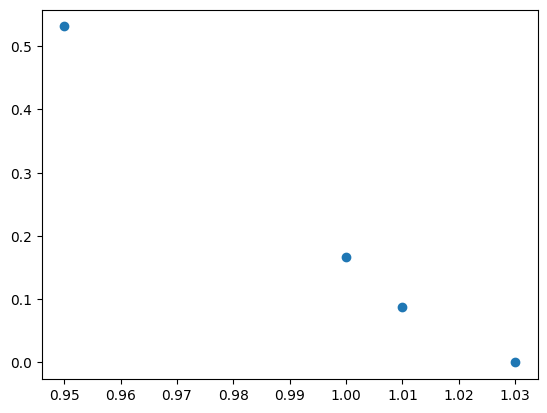

In [19]:
x, y = zip(*pairs)

# Create a scatter plot
plt.scatter(x, y)

# Show the plot
plt.show()

In [20]:
import seaborn as sns

/Users/matentzn/.pyenv/versions/3.10.4/envs/mappergpt/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/matentzn/.pyenv/versions/3.10.4/envs/mappergpt/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


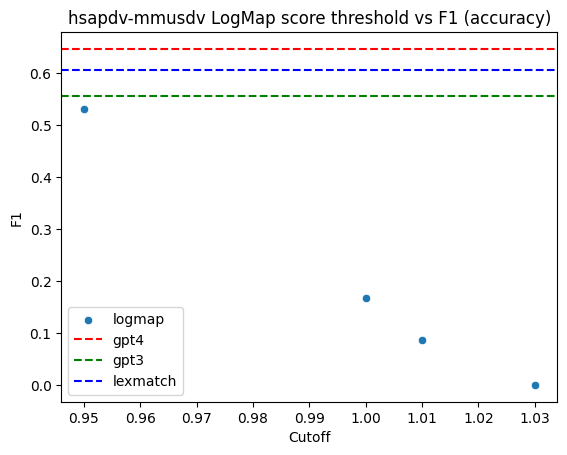

In [21]:
df = pd.DataFrame(pairs, columns=['Cutoff', 'F1'])

# Create a scatter plot
sns.scatterplot(data=df, x='Cutoff', y='F1', label="logmap")

lines = [(gpt4, "gpt4", "red"), (gpt3, "gpt3", "green"), (lexmatch, "lexmatch", "blue")]

for r, label, color in lines:
    plt.axhline(evaluate(r, curated)[0], color=color, linestyle='--', label=label)

plt.legend()

# Adding labels
plt.xlabel('Cutoff')
plt.ylabel('F1')
plt.title(f'{task} LogMap score threshold vs F1 (accuracy)')

plt.savefig(f"../content/images/logmap-scatter-plot-{task}.pdf", format='pdf')

# Show the plot
plt.show()

In [22]:
import plotly

In [23]:
import plotly.io as pio
pio.renderers.default='notebook'

In [24]:
plt.savefig(f"logmap-scatter-plot-{task}.pdf", format='pdf')

<Figure size 640x480 with 0 Axes>

In [25]:
plt.savefig(f"logmap-scatter-plot-{task}.png", format='png')

<Figure size 640x480 with 0 Axes>

In [26]:
def diffs(x, y):
    x2 = x.query("predicate_id == 'skos:exactMatch'")
    y2 = y.query("predicate_id == 'skos:exactMatch'")
    cols = ["subject_id", "subject_label", "object_id", "object_label"]
    xset = set([tuple(v) for v in x2[cols].values])
    yset = set([tuple(v) for v in y2[cols].values])
    return xset-yset

diffs(logmap_best, gpt4)

{('HsapDv:0000001', 'life cycle', 'MmusDv:0000001', 'life cycle'),
 ('HsapDv:0000175',
  '2-month-old stage',
  'MmusDv:0000062',
  '2-month-old stage'),
 ('HsapDv:0000176',
  '3-month-old stage',
  'MmusDv:0000063',
  '3-month-old stage'),
 ('HsapDv:0000177',
  '4-month-old stage',
  'MmusDv:0000064',
  '4-month-old stage'),
 ('HsapDv:0000178',
  '5-month-old stage',
  'MmusDv:0000069',
  '5-month-old stage'),
 ('HsapDv:0000179',
  '6-month-old stage',
  'MmusDv:0000077',
  '6-month-old stage'),
 ('HsapDv:0000180',
  '7-month-old stage',
  'MmusDv:0000078',
  '7-month-old stage'),
 ('HsapDv:0000181',
  '8-month-old stage',
  'MmusDv:0000079',
  '8-month-old stage'),
 ('HsapDv:0000182',
  '9-month-old stage',
  'MmusDv:0000080',
  '9-month-old stage'),
 ('HsapDv:0000183',
  '10-month-old stage',
  'MmusDv:0000081',
  '10-month-old stage'),
 ('HsapDv:0000184',
  '11-month-old stage',
  'MmusDv:0000082',
  '11-month-old stage'),
 ('HsapDv:0000185',
  '12-month-old stage',
  'MmusDv:00000